## Attributes

1 Gender - student's gender (nominal: 'Male' or 'Female’)

2 Nationality- student's nationality (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’ Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)

3 Place of birth- student's Place of birth (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’ Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)

4 Educational Stages- educational level student belongs (nominal: ‘lowerlevel’,’MiddleSchool’,’HighSchool’)

5 Grade Levels- grade student belongs (nominal: ‘G-01’, ‘G-02’, ‘G-03’, ‘G-04’, ‘G-05’, ‘G-06’, ‘G-07’, ‘G-08’, ‘G-09’, ‘G-10’, ‘G-11’, ‘G-12 ‘)

6 Section ID- classroom student belongs (nominal:’A’,’B’,’C’)

7 Topic- course topic (nominal:’ English’,’ Spanish’, ‘French’,’ Arabic’,’ IT’,’ Math’,’ Chemistry’, ‘Biology’, ‘Science’,’ History’,’ Quran’,’ Geology’)

8 Semester- school year semester (nominal:’ First’,’ Second’)

9 Parent responsible for student (nominal:’mom’,’father’)

10 Raised hand- how many times the student raises his/her hand on classroom (numeric:0-100)

11- Visited resources- how many times the student visits a course content(numeric:0-100)

12 Viewing announcements-how many times the student checks the new announcements(numeric:0-100)

13 Discussion groups- how many times the student participate on discussion groups (numeric:0-100)

14 Parent Answering Survey- parent answered the surveys which are provided from school or not (nominal:’Yes’,’No’)

15 Parent School Satisfaction- the Degree of parent satisfaction from school(nominal:’Yes’,’No’)

16 Student Absence Days-the number of absence days for each student (nominal: above-7, under-7)

## The students are classified into three numerical intervals based on their total grade/mark:

Low-Level: interval includes values from 0 to 69,

Middle-Level: interval includes values from 70 to 89,

High-Level: interval includes values from 90-100.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

data = pd.read_csv('xAPI-Edu-Data.csv') #columns = ['Gender','Nationality', 'PlaceofBirth','StageID','GradeID','SectionID'
                                              #,'Topic','Semester','Relation','RaisedHands','VisitedResources'
                                              #,'AnnoucementsView','Discussion','ParentAnsweringSurvey',
                                              #'ParentSchoolSatisfaction','StudentAbsenceDays','Class/FinalGrade'])
data.head()


    



,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


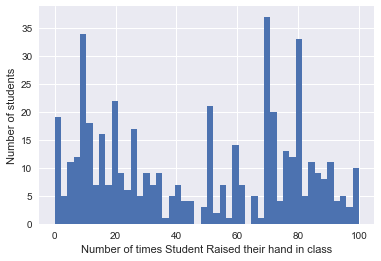

In [2]:
%matplotlib inline
plt.hist(data['raisedhands'], bins = 48)
plt.xlabel("Number of times Student Raised their hand in class")
plt.ylabel("Number of students")



In [3]:
data.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [4]:
raised_hands = data['raisedhands']
discussion = data['Discussion']
v_resources = data['VisITedResources']
v_announcements = data['AnnouncementsView']

def correlation(x,y):
    std_x = (x-x.mean())/x.std(ddof=0)
    std_y = (y-y.mean())/y.std(ddof=0)
    
    return (std_x * std_y).mean()

print (correlation(raised_hands, discussion))

print (correlation(raised_hands, v_resources))

print (correlation(v_resources, discussion))

0.3393859910133952
0.6915717054692965
0.24329176916115017


Populating the interactive namespace from numpy and matplotlib


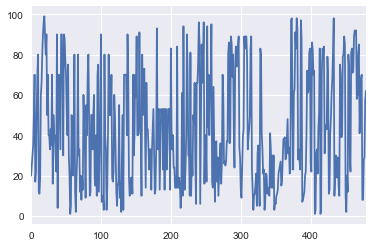

In [5]:
%pylab inline
data['Discussion'].plot()


Populating the interactive namespace from numpy and matplotlib
       raisedhands  VisITedResources  AnnouncementsView  Discussion
Class                                                              
H        70.288732         78.746479          53.380282   53.661972
L        16.889764         18.322835          15.574803   30.834646
M        48.938389         60.635071          40.962085   43.791469


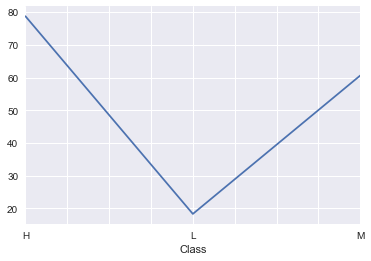

In [6]:
import pandas as pd
import seaborn as sns
%pylab inline

avg_grades = data.groupby('Class').mean()

print (avg_grades)

grades_and_hands = data.groupby('Class').mean()['VisITedResources']

grades_and_hands.plot()




Populating the interactive namespace from numpy and matplotlib
0    50
1    50
2    10
3    10
4    50
Name: Class, dtype: int64
VisITedResources
0     4.285714
1     5.000000
2    15.900000
3     9.600000
4    19.400000
Name: raisedhands, dtype: float64
Current size: [6.0, 4.0]


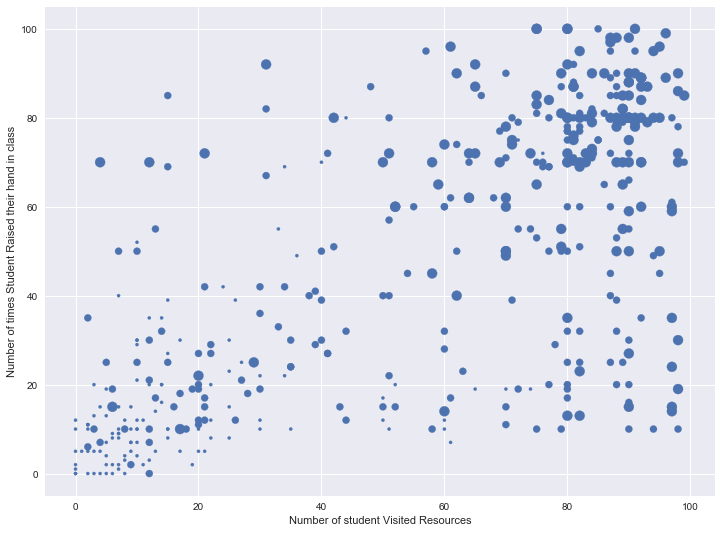

In [7]:
import pandas as pd
import seaborn as sns
%pylab inline

def new_grade(grade):
    if grade == 'H':
        return 100
    elif grade == 'M':
        return 50
    elif grade == 'L':
        return 10
    
def new_grades(grades): 
    return grades.apply(new_grade)

print (new_grades(data['Class']).head())

converted_grades = new_grades(data['Class'])

resources_to_raisedhands = data.groupby('VisITedResources').mean()['raisedhands'].head()
print (resources_to_raisedhands)

fig_size = plt.rcParams["figure.figsize"]
print ("Current size:", fig_size)
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.scatter(data['VisITedResources'], data['raisedhands'], s = converted_grades,)
plt.ylabel("Number of times Student Raised their hand in class")
plt.xlabel("Number of student Visited Resources")